In [2]:
import pandas as pd
import numpy as np

# 1. Importación de datos del Dane

Estos son los archivos usados y las fuentes:

|     Archivo      |              Descripción               |                                                                        Fuente                                                                         |
|:----------------:|:--------------------------------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------:|
|  `hogar1.xlsx`   |           Hogares hasta 2017           |  [Consultar](https://www.dane.gov.co/files/censo2018/proyecciones-vivienda-hogares/anexo-proyecciones-hogares-dptal-1993-2017-mnpal-2005-2017.xlsx)   |
|  `hogar2.xlsx`   |           Hogares desde 2018           |   [Consultar](https://www.dane.gov.co/files/censo2018/proyecciones-vivienda-hogares/anexo-proyecciones-hogares-dptal-2018-2050-mpal-2018-2035.xlsx)   |
|   `vivi1.xlsx`   |          Viviendas hasta 2017          | [Consultar](https://www.dane.gov.co/files/censo2018/proyecciones-vivienda-hogares/anexo-proyecciones-viviendas-dptal-1993-2017-mnpal-2005-2017.xlsx)  |
|   `vivi2.xlsx`   |          Viviendas desde 2018          |         [Consultar](https://www.dane.gov.co/files/censo2018/proyecciones-vivienda-hogares/anexo-proyecciones-viviendas-dptal-2018-2050.xlsx)          |
|    `pib.xlsx`    |    Histórico PIB por departamentos     | [Consultar](https://www.dane.gov.co/files/investigaciones/pib/departamentales/B_2015/anexo-2021-preliminar-retropolacion-departamento-1980-2021.xlsx) |
| `vagregado.xlsx` | Histórico valor agregado por muncipios | [Consultar](https://www.dane.gov.co/files/investigaciones/pib/departamentales/B_2015/anexo-2020-provisional-valor-agregado-municipio-2011-2020.xlsx)  |

Estos archivos tuvieron unas pequeñas modificaciones en Excel para hacer más fácil su lectura con la función `pd.read_excel`.

## 1.1. Se leen los archivos de hogares y viviendas y se unifican

In [3]:
df_hog1=pd.read_excel("./dane/hogar1.xlsx",sheet_name="esta")[1:]
df_hog2=pd.read_excel("./dane/hogar2.xlsx",sheet_name="esta")[1:]
df_viv1=pd.read_excel("./dane/vivi1.xlsx",sheet_name="esta")[1:]
df_viv2=pd.read_excel("./dane/vivi2.xlsx",sheet_name="esta")[1:]
df_viv=df_viv1.merge(df_viv2,on=["depto","mpio","tipo"],how='outer').fillna(0)
df_hog=df_hog1.merge(df_hog2,on=["depto","mpio","tipo"],how='outer').fillna(0)
del df_viv2,df_viv1,df_hog1,df_hog2

In [4]:
df_viv.head()

,depto_id_x,depto,mpio_id_x,mpio,tipo,2005,2006,2007,2008,2009,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,5.0,Antioquia,5001.0,Medellín,Total,556418.0,572828.0,591044.0,611241.0,633260.0,...,1159832.0,1196061.0,1231192.0,1264978.0,1297160.0,1328247.0,1358721.0,1388597.0,1417922.0,1446673.0
1,5.0,Antioquia,5001.0,Medellín,Cabecera,542757.0,558952.0,576799.0,596467.0,617762.0,...,1137602.0,1173345.0,1208006.0,1241247.0,1272877.0,1303396.0,1333299.0,1362584.0,1391333.0,1419490.0
2,5.0,Antioquia,5001.0,Medellín,Centros Poblados y Rural Disperso,13661.0,13876.0,14245.0,14774.0,15498.0,...,22230.0,22716.0,23186.0,23731.0,24283.0,24851.0,25422.0,26013.0,26589.0,27183.0
3,5.0,Antioquia,5002.0,Abejorral,Total,7175.0,7252.0,7368.0,7511.0,7710.0,...,11256.0,11543.0,11833.0,12133.0,12421.0,12711.0,13002.0,13300.0,13597.0,13868.0
4,5.0,Antioquia,5002.0,Abejorral,Cabecera,2186.0,2229.0,2288.0,2352.0,2433.0,...,4901.0,5056.0,5200.0,5344.0,5477.0,5607.0,5738.0,5866.0,5987.0,6101.0


Hay errores en el id del departamento.

In [5]:
df_hog[(df_hog.depto_id_x!=df_hog.depto_id_y)]

,depto_id_x,depto,mpio_id_x,mpio,tipo,2005,2006,2007,2008,2009,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
3268,91.0,Amazonas,91263.0,El Encanto (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3271,91.0,Amazonas,91405.0,La Chorrera (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,91.0,Amazonas,91407.0,La Pedrera (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3277,91.0,Amazonas,91430.0,La Victoria (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3280,91.0,Amazonas,91460.0,Miriti - Paraná (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3283,91.0,Amazonas,91530.0,Puerto Alegría (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3286,91.0,Amazonas,91536.0,Puerto Arica (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3292,91.0,Amazonas,91669.0,Puerto Santander (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3295,91.0,Amazonas,91798.0,Tarapacá (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3304,94.0,Guainía,94663.0,Mapiripana (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Los errores en el id del municipio no son relevantes.

In [6]:
df_hog[(df_hog.mpio_id_x!=df_hog.mpio_id_y)]

,depto_id_x,depto,mpio_id_x,mpio,tipo,2005,2006,2007,2008,2009,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
3268,91.0,Amazonas,91263.0,El Encanto (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3271,91.0,Amazonas,91405.0,La Chorrera (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,91.0,Amazonas,91407.0,La Pedrera (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3277,91.0,Amazonas,91430.0,La Victoria (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3280,91.0,Amazonas,91460.0,Miriti - Paraná (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3283,91.0,Amazonas,91530.0,Puerto Alegría (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3286,91.0,Amazonas,91536.0,Puerto Arica (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3292,91.0,Amazonas,91669.0,Puerto Santander (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3295,91.0,Amazonas,91798.0,Tarapacá (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3304,94.0,Guainía,94663.0,Mapiripana (CD),Cabecera,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.2. Importación de datos económicos

In [8]:
df_pib=pd.read_excel("./dane/pib.xlsx",sheet_name="esta")
df_va=pd.read_excel("./dane/vagregado.xlsx",sheet_name="esta")
df_va.columns=['mpio_id','mpio','depto_id','depto',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
df_va.head()

,mpio_id,mpio,depto_id,depto,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,5001,Medellín,5,Antioquia,34442.533356,36924.720125,40880.873855,43042.337120,45551.404608,49047.761437,51394.011711,55082.301180,59434.240203,56911.343578
1,5002,Abejorral,5,Antioquia,127.175011,149.297199,148.804371,159.844908,172.950168,202.311691,234.833122,231.172055,244.494059,242.763952
2,5004,Abriaquí,5,Antioquia,17.549168,17.277452,17.646686,18.790072,18.197030,20.171697,21.674609,28.562662,31.816859,32.94684
3,5021,Alejandría,5,Antioquia,89.982678,34.581247,37.736771,39.952244,42.639327,46.560466,51.273272,52.334339,56.855260,57.620284
4,5030,Amagá,5,Antioquia,216.948524,262.574210,270.484607,315.780855,333.042072,358.089541,468.548773,492.098704,535.866833,534.652315


# 2. Usando geopandas

Para una correcta instalación de `geopandas` es mejor usar `conda` y un environment, tal como se explica en la [documentación en línea](https://geopandas.org/en/stable/getting_started/install.html).

In [9]:
import geopandas

Leemos el archivo con polígonos de municipio.

In [10]:
data_geo = geopandas.read_file("MunicipiosVeredas19MB.json")
# este dato fue extraído de la siguiente página: https://www.kaggle.com/code/alfredomaussa/colombia-municipios/notebook
data_geo.head()

,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,05001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,05002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,05004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,05021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,05030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."


Supongamos que le queremos dar a cada municipio un color *proporcional* a la columna `new`.

<AxesSubplot:>

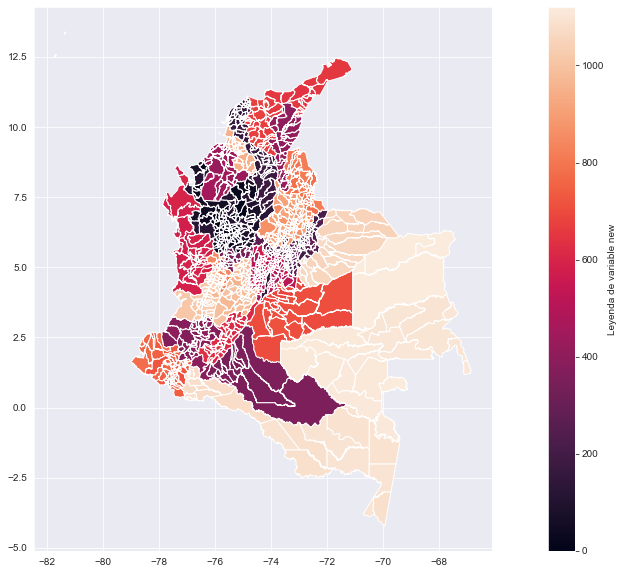

In [11]:
data_geo['new']=np.arange(len(data_geo))
data_geo.plot(column='new',  #Assign numerical data column
              legend=True,  #Decide to show legend or not
              figsize=[20, 10],
              legend_kwds={'label': "Leyenda de variable new"})